###   --------------------------- Observations for Transactions Table -------------------------------

### 1. Data Quality Issues

1. Missing Values:

        BARCODE has 5,762 missing values (~11.5% missing).
        FINAL_SALE has many missing values, suggesting incomplete transaction data.


2. Data Type Issues:

        SCAN_DATE is stored as strings (object type) instead of datetime.
        FINAL_QUANTITY has entries like "zero", which should likely be numeric (0).
        BARCODE is a float64, which can cause rounding issues (should be string).

3. Potential Formatting Issues:

        SCAN_DATE has a timestamp (2024-08-21 14:19:06.539 Z), but PURCHASE_DATE does not
        FINAL_SALE is missing in some transactions, indicating potential incomplete sales data.

### 2. Examine Data with Python and Data Visualization

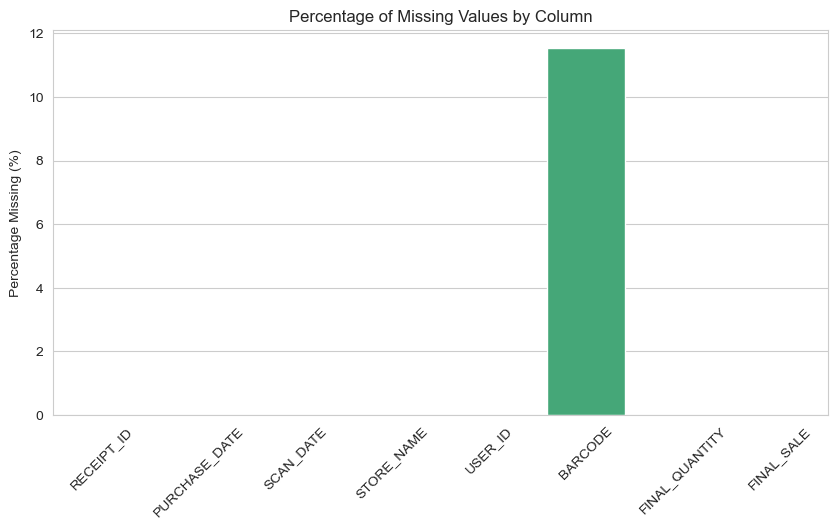

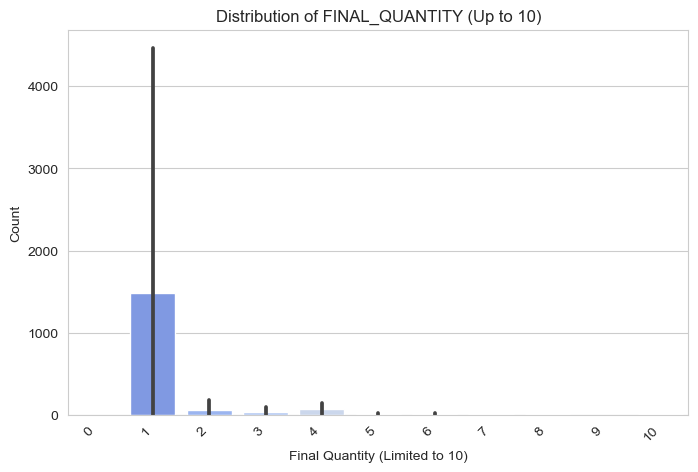

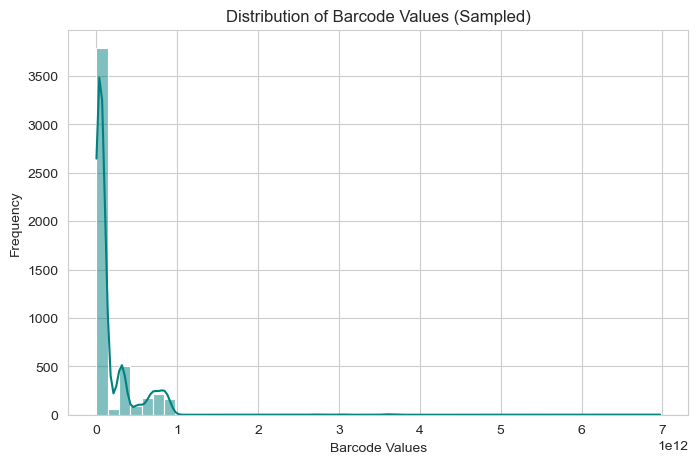

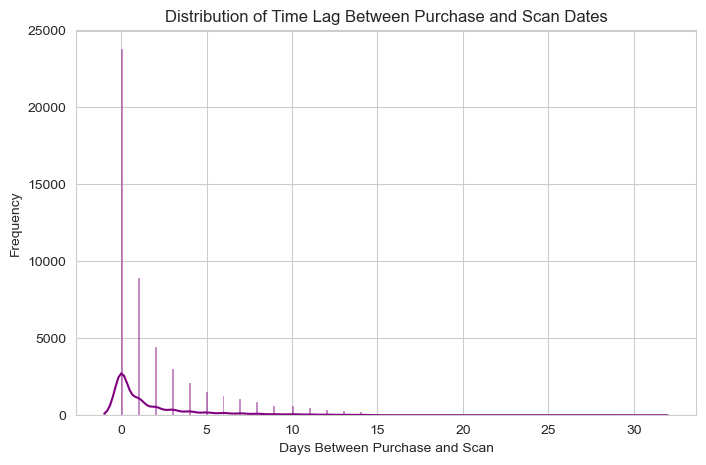

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "TRANSACTION_TAKEHOME.csv"  
df_trans = pd.read_csv(file_path)

# Set visualization style
sns.set_style("whitegrid")

### 1. Missing Values Bar Chart ###
# This calculates the percentage of missing values for each column and plots them using a bar chart.
missing_values = df_trans.isnull().sum() / len(df_trans) * 100  # Percentage of missing values

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Percentage Missing (%)")
plt.title("Percentage of Missing Values by Column")
plt.show()



### 2. Data Formatting Issues (FINAL_QUANTITY) ###
# This checks if 'FINAL_QUANTITY' has inconsistent values like "zero" instead of numerical 0
# and shows the distribution of quantities accordingly

# Count occurrences of each unique value
quantity_counts = df_trans["FINAL_QUANTITY"].value_counts()

# Convert to numeric values, handling non-numeric cases like "zero"
quantity_counts.index = pd.to_numeric(quantity_counts.index, errors='coerce')

# Filter for values up to 10 only
quantity_counts = quantity_counts[quantity_counts.index <= 10]

# Sort the values for better visualization
quantity_counts = quantity_counts.sort_index()

# Plot the cleaned and filtered distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=quantity_counts.index.astype(int), y=quantity_counts.values, palette="coolwarm")

# Adjust x-axis labels
plt.xticks(rotation=45, ha="right")  
plt.ylabel("Count")
plt.xlabel("Final Quantity (Limited to 10)")
plt.title("Distribution of FINAL_QUANTITY (Up to 10)")
plt.show()


### 3.  Barcode Distribution (Sampling to avoid memory issues) ###
# Since barcode values are large, this samples 5000 values for visualization and ensures no truncation.
barcode_sample = df_trans["BARCODE"].dropna().sample(n=5000, random_state=42)  # Sampled for efficiency

plt.figure(figsize=(8, 5))
sns.histplot(barcode_sample, bins=50, kde=True, color="teal")
plt.xlabel("Barcode Values")
plt.ylabel("Frequency")
plt.title("Distribution of Barcode Values (Sampled)")
plt.show()




### 4. Purchase Date vs. Scan Date Differences (Time Lag Analysis) ###
# Converts dates to proper format, calculates time lag, and visualizes potential delays in data collection.
# Convert to datetime and remove timezone info (if present)
df_trans["PURCHASE_DATE"] = pd.to_datetime(df_trans["PURCHASE_DATE"], errors="coerce")
df_trans["SCAN_DATE"] = pd.to_datetime(df_trans["SCAN_DATE"], errors="coerce").dt.tz_localize(None)

# Calculate time lag (in days)
df_trans["TIME_LAG"] = (df_trans["SCAN_DATE"] - df_trans["PURCHASE_DATE"]).dt.days

# Plot distribution of time lag
plt.figure(figsize=(8, 5))
sns.histplot(df_trans["TIME_LAG"].dropna(), bins=300, kde=True, color="purple")
plt.xlabel("Days Between Purchase and Scan")
plt.ylabel("Frequency")
plt.title("Distribution of Time Lag Between Purchase and Scan Dates")
plt.show()



### Challenging fields to Understand

1. BARCODE Formatting:

     Some values appear in scientific notation (e.g., 8.75754E+11), which may cause precision issues.
     
2. FINAL_QUANTITY Values:

     Contains "zero" instead of 0, which could lead to errors in numeric operations.


3. SCAN_DATE vs. PURCHASE_DATE:

      Some transactions might have different scan and purchase dates—do they indicate delays?